<a href="https://colab.research.google.com/github/vipulgote1999/-10daysofMLChallenge/blob/master/Day_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator

In [200]:
df_Confirmed=pd.read_csv('/content/drive/My Drive/datasets/Tensorflow  community challenge /Datasets /time_series_2019-ncov-Confirmed (1).csv')
df_Confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [201]:
draft=df_Confirmed.copy()
df_Confirmed.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [202]:
df_Confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,30.580962,-33.601551,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,16.907598,20.383984,24.718686,34.470226,40.823409,49.059548,56.745380,63.279261,70.618070,76.221766,82.443532,87.806982,91.995893,92.856263,123.958932,137.340862,141.745380,146.250513,150.427105,154.283368,155.316222,156.462012,157.747433,161.353183,162.145791,163.383984,165.119097,167.135524,169.926078,172.731006,176.613963,181.455852,185.433265,190.636550,195.318275,200.989733,209.002053,217.291581,225.451745,233.184805,243.515400,258.449692,263.537988,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,19.645817,81.064011,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,224.934544,266.700712,328.167736,509.770317,616.199457,759.372972,894.810687,1005.857379,1134.662323,1232.053868,1346.701977,1441.711614,1515.952301,1516.246437,2187.207498,2467.826494,2551.329127,2638.883597,2720.719605,2797.390990,2813.227422,2831.838619,2841.890472,2906.276891,2906.341402,2915.616686,2938.275585,2956.626633,2975.654917,2990.886286,3011.609857,3039.283579,3050.440003,3059.817815,3068.479139,3079.154546,3092.273854,3105.489134,3118.029077,3132.790594,3145.105188,3170.345089,3177.926018,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [203]:
key=df_Confirmed.describe().keys()
key

Index(['Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [204]:
df_Confirmed=df_Confirmed.drop(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20'],axis=1)
df_Confirmed.describe()

,Lat,Long,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,30.580962,-33.601551,185.433265,190.636550,195.318275,200.989733,209.002053,217.291581,225.451745,233.184805,243.515400,258.449692,263.537988,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,19.645817,81.064011,3050.440003,3059.817815,3068.479139,3079.154546,3092.273854,3105.489134,3118.029077,3132.790594,3145.105188,3170.345089,3177.926018,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,42.171200,22.380900,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,5.000000,7.000000,9.000000,12.000000,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,71.706900,178.065000,67103.000000,67217.000000,67332.000000,67466.000000,67592.000000,67666.000000,67707.000000,67743.000000,67760.000000,67773.000000,67781.000000,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [0]:
#df_Confirmed.head()

In [0]:
lastest_confirmed=df_Confirmed['3/22/20']

# **confirmed cases throughout the world reported**

In [0]:
df_contoury_wise=df_Confirmed.sort_values(by=['Country/Region'])
unique_country_list=list(df_contoury_wise['Country/Region'].unique())

In [0]:
confirmed_country_list=[]
no_cases=[]
for i in unique_country_list:
  cases = lastest_confirmed[df_Confirmed['Country/Region']==i].sum()
  if cases>0:
    confirmed_country_list.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_country_list.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_country_list, confirmed_country_list), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_country_list[i] = lastest_confirmed[df_Confirmed['Country/Region']==unique_countries[i]].sum()

In [209]:
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}: {confirmed_country_list[i]} cases')

China: 81397 cases
Italy: 59138 cases
US: 33272 cases
Spain: 28768 cases
Germany: 24873 cases
Iran: 21638 cases
France: 16176 cases
Korea, South: 8897 cases
Switzerland: 7245 cases
United Kingdom: 5741 cases
Netherlands: 4216 cases
Belgium: 3401 cases
Austria: 3244 cases
Norway: 2383 cases
Sweden: 1934 cases
Portugal: 1600 cases
Brazil: 1593 cases
Denmark: 1514 cases
Canada: 1465 cases
Australia: 1314 cases
Malaysia: 1306 cases
Turkey: 1236 cases
Czechia: 1120 cases
Japan: 1086 cases
Israel: 1071 cases
Ireland: 906 cases
Luxembourg: 798 cases
Ecuador: 789 cases
Pakistan: 776 cases
Cruise Ship: 712 cases
Poland: 634 cases
Chile: 632 cases
Finland: 626 cases
Greece: 624 cases
Thailand: 599 cases
Iceland: 568 cases
Indonesia: 514 cases
Saudi Arabia: 511 cases
Qatar: 494 cases
Singapore: 455 cases
Romania: 433 cases
Slovenia: 414 cases
India: 396 cases
Philippines: 380 cases
Russia: 367 cases
Peru: 363 cases
Bahrain: 332 cases
Egypt: 327 cases
Estonia: 326 cases
South Africa: 274 cases
Cro

In [0]:
unique_provinces =  list(df_Confirmed['Province/State'].unique())

outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

In [0]:
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = lastest_confirmed[df_Confirmed['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = lastest_confirmed[df_Confirmed['Province/State']==unique_provinces[i]].sum()

In [0]:
#unique_provinces

In [213]:
print('Confirmed Cases by Province/States (US, China, Australia, Canada):')
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Confirmed Cases by Province/States (US, China, Australia, Canada):
Hubei: 67800 cases
New York: 15793 cases
Netherlands: 4204 cases
Washington: 1996 cases
New Jersey: 1914 cases
California: 1642 cases
Guangdong: 1407 cases
Henan: 1273 cases
Zhejiang: 1237 cases
Illinois: 1049 cases
Michigan: 1037 cases
Hunan: 1018 cases
Anhui: 990 cases
Jiangxi: 936 cases
Louisiana: 837 cases
Florida: 830 cases
Shandong: 766 cases
Diamond Princess: 761 cases
Massachusetts: 646 cases
Jiangsu: 633 cases
Texas: 627 cases
Georgia: 600 cases
Chongqing: 577 cases
Sichuan: 543 cases
New South Wales: 533 cases
Beijing: 514 cases
Pennsylvania: 509 cases
Tennessee: 505 cases
Heilongjiang: 484 cases
Colorado: 476 cases
Ontario: 425 cases
British Columbia: 424 cases
Shanghai: 394 cases
Wisconsin: 381 cases
Ohio: 355 cases
Hebei: 319 cases
Hong Kong: 317 cases
Fujian: 307 cases
North Carolina: 302 cases
Victoria: 296 cases
Alberta: 259 cases
Guangxi: 254 cases
Shaanxi: 248 cases
Maryland: 244 cases
Connecticut: 223

In [0]:
nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

In [0]:
import random
import matplotlib.colors as mcolors

In [216]:
'''c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(15,15))
plt.pie(confirmed_country_list, colors=c)
plt.legend(unique_countries, loc='best', bbox_to_anchor=(0.7, 0., 1, 1))
plt.title('confirmed cases which are repored from country till the last date',size=32)
plt.show()'''

"c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))\nplt.figure(figsize=(15,15))\nplt.pie(confirmed_country_list, colors=c)\nplt.legend(unique_countries, loc='best', bbox_to_anchor=(0.7, 0., 1, 1))\nplt.title('confirmed cases which are repored from country till the last date',size=32)\nplt.show()"

# **Date wise plot**

In [0]:
dates=df_Confirmed.keys()
dates=dates[4:]
dates=list(dates)

In [218]:
df_Confirmed.head()

,Province/State,Country/Region,Lat,Long,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [219]:
cases_on_dates=[]
for i in dates:
  sum_of_cases=df_Confirmed[i].sum()
  cases_on_dates.append(sum_of_cases)
  print(f'{i}: {sum_of_cases}')

3/2/20: 90306
3/3/20: 92840
3/4/20: 95120
3/5/20: 97882
3/6/20: 101784
3/7/20: 105821
3/8/20: 109795
3/9/20: 113561
3/10/20: 118592
3/11/20: 125865
3/12/20: 128343
3/13/20: 145193
3/14/20: 156094
3/15/20: 167446
3/16/20: 181527
3/17/20: 197142
3/18/20: 214910
3/19/20: 242708
3/20/20: 272166
3/21/20: 304524
3/22/20: 335955


In [0]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))

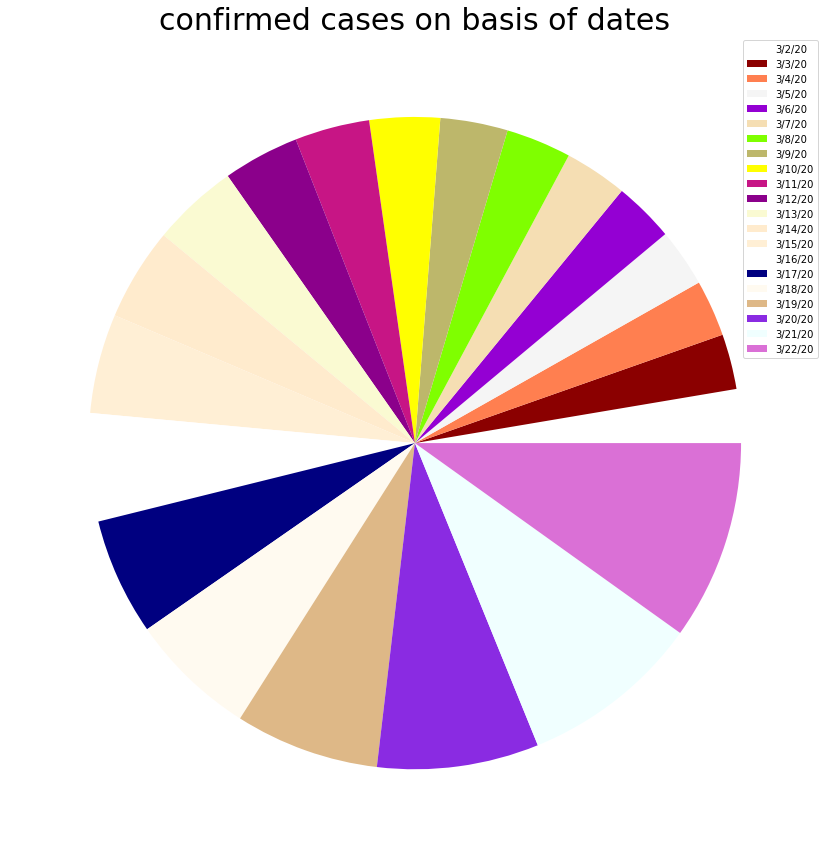

In [221]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(dates))
plt.figure(figsize=(15,15))
plt.pie(cases_on_dates,colors=c)
plt.title('confirmed cases on basis of dates',size=30)
plt.legend(dates, loc='best')
plt.show()

# **continent plot**

# top 10 country in which most of cases reporeted



```
# confirmed_country_list,unique_countries
```



In [0]:
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_country_list[10:])
for i in range(len(confirmed_country_list[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_country_list[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

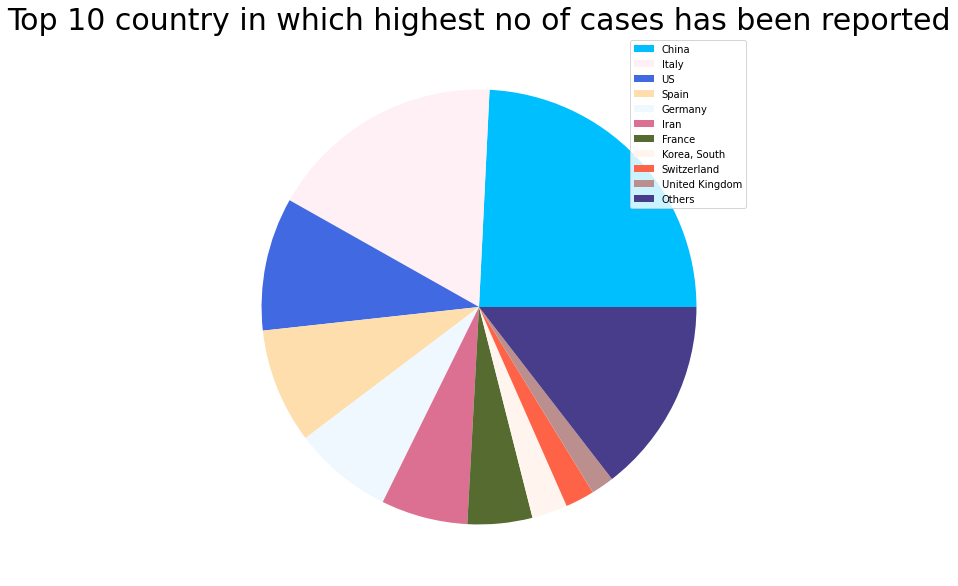

In [267]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(dates))
plt.figure(figsize=(10,10))
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries,loc='best')
plt.title('Top 10 country in which highest no of cases has been reported',size=30)
plt.show()

In [224]:
for i,j in enumerate(unique_countries):
  print(i,j)

0 China
1 Italy
2 US
3 Spain
4 Germany
5 Iran
6 France
7 Korea, South
8 Switzerland
9 United Kingdom
10 Netherlands
11 Belgium
12 Austria
13 Norway
14 Sweden
15 Portugal
16 Brazil
17 Denmark
18 Canada
19 Australia
20 Malaysia
21 Turkey
22 Czechia
23 Japan
24 Israel
25 Ireland
26 Luxembourg
27 Ecuador
28 Pakistan
29 Cruise Ship
30 Poland
31 Chile
32 Finland
33 Greece
34 Thailand
35 Iceland
36 Indonesia
37 Saudi Arabia
38 Qatar
39 Singapore
40 Romania
41 Slovenia
42 India
43 Philippines
44 Russia
45 Peru
46 Bahrain
47 Egypt
48 Estonia
49 South Africa
50 Croatia
51 Mexico
52 Lebanon
53 Panama
54 Iraq
55 Colombia
56 Argentina
57 Serbia
58 Dominican Republic
59 Algeria
60 Armenia
61 Kuwait
62 Bulgaria
63 Slovakia
64 Taiwan*
65 San Marino
66 United Arab Emirates
67 Latvia
68 Uruguay
69 Costa Rica
70 Hungary
71 Lithuania
72 Bosnia and Herzegovina
73 Morocco
74 North Macedonia
75 Andorra
76 Vietnam
77 Jordan
78 Cyprus
79 Moldova
80 Malta
81 Albania
82 Brunei
83 Cambodia
84 Sri Lanka
85 Belarus

In [225]:
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}: {confirmed_country_list[i]} ')

China: 81397 
Italy: 59138 
US: 33272 
Spain: 28768 
Germany: 24873 
Iran: 21638 
France: 16176 
Korea, South: 8897 
Switzerland: 7245 
United Kingdom: 5741 
Netherlands: 4216 
Belgium: 3401 
Austria: 3244 
Norway: 2383 
Sweden: 1934 
Portugal: 1600 
Brazil: 1593 
Denmark: 1514 
Canada: 1465 
Australia: 1314 
Malaysia: 1306 
Turkey: 1236 
Czechia: 1120 
Japan: 1086 
Israel: 1071 
Ireland: 906 
Luxembourg: 798 
Ecuador: 789 
Pakistan: 776 
Cruise Ship: 712 
Poland: 634 
Chile: 632 
Finland: 626 
Greece: 624 
Thailand: 599 
Iceland: 568 
Indonesia: 514 
Saudi Arabia: 511 
Qatar: 494 
Singapore: 455 
Romania: 433 
Slovenia: 414 
India: 396 
Philippines: 380 
Russia: 367 
Peru: 363 
Bahrain: 332 
Egypt: 327 
Estonia: 326 
South Africa: 274 
Croatia: 254 
Mexico: 251 
Lebanon: 248 
Panama: 245 
Iraq: 233 
Colombia: 231 
Argentina: 225 
Serbia: 222 
Dominican Republic: 202 
Algeria: 201 
Armenia: 194 
Kuwait: 188 
Bulgaria: 187 
Slovakia: 185 
Taiwan*: 169 
San Marino: 160 
United Arab Emira

102

In [0]:
visual_unique_countries_all = [] 
visual_confirmed_cases_all = []
others = np.sum(confirmed_country_list[20:])
for i in range(len(confirmed_country_list[:20])):
    visual_unique_countries_all.append(unique_countries[i])
    visual_confirmed_cases_all.append(confirmed_country_list[i])

visual_unique_countries_all.append('Others')
visual_confirmed_cases_all.append(others)

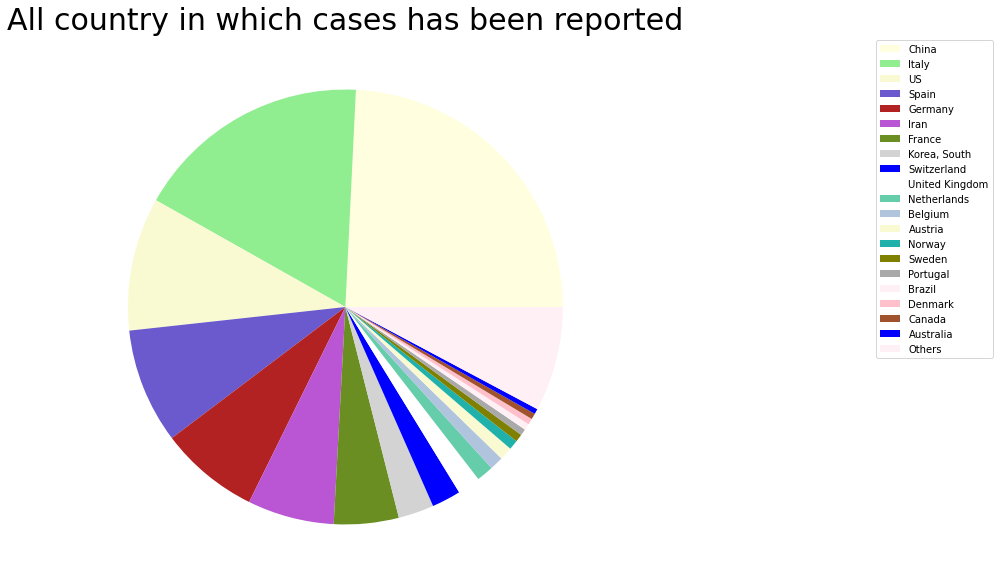

In [266]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(dates))
plt.figure(figsize=(10,10))
plt.pie(visual_confirmed_cases_all,colors=c)
plt.legend(visual_unique_countries_all,loc='best',bbox_to_anchor=(0.7, 0., 1, 1))
plt.title('All country in which cases has been reported',size=30)
plt.show()

In [0]:
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

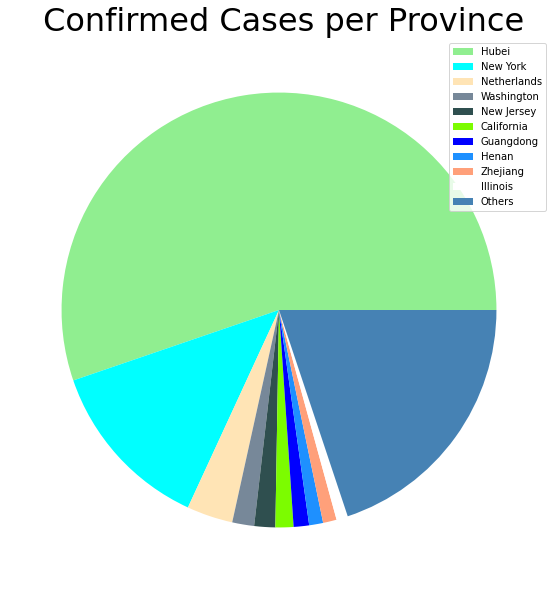

In [264]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(10,10))
plt.title(' Confirmed Cases per Province',size=32)
plt.pie(visual_confirmed_cases2, colors=c)
plt.legend(visual_unique_provinces, loc='best')
plt.show()

# so we are going to plot these top 10 countrys

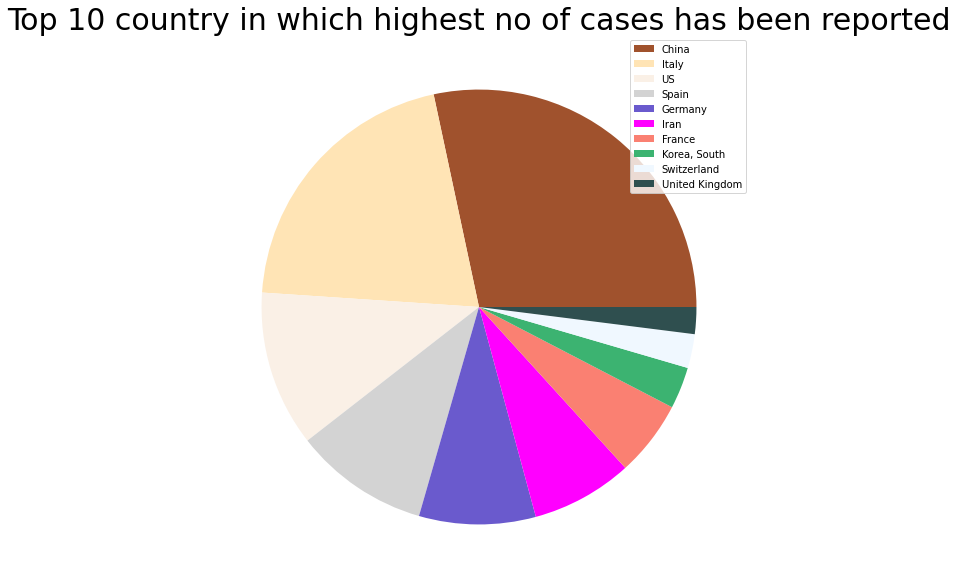

In [265]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(dates))
plt.figure(figsize=(10,10))
plt.pie(confirmed_country_list[:10],colors=c)
plt.legend(unique_countries[:10],loc='best')
plt.title('Top 10 country in which highest no of cases has been reported',size=30)
plt.show()

In [0]:
by_Continent=['Europe','Asia','Africa','North america','South america','Australia']

In [0]:
#s=list(map(str,input().split(" ")))

In [0]:
#Australia=s

In [234]:
'''Australia.append('Marshall Islands')
Australia.append('Solomon Islands')
Australia.append('New Zealand')
Australia.append('Papua New Guinea')'''

"Australia.append('Marshall Islands')\nAustralia.append('Solomon Islands')\nAustralia.append('New Zealand')\nAustralia.append('Papua New Guinea')"

In [235]:
'''South_America=s
South_America'''

'South_America=s\nSouth_America'

In [236]:
'''North_America=[]
North_America=s
North_America'''

'North_America=[]\nNorth_America=s\nNorth_America'

In [237]:
'''North_America.append('Antigua and Barbuda')
North_America.append('El Salvador')
North_America.append('Dominican Republic')
North_America.append('Saint Kitts and Nevis')
North_America.append('Saint Lucia')
North_America.append('Saint Vincent and the Grenadines')
North_America.append('United States of America')
North_America.append('Trinidad and Tobago')'''

"North_America.append('Antigua and Barbuda')\nNorth_America.append('El Salvador')\nNorth_America.append('Dominican Republic')\nNorth_America.append('Saint Kitts and Nevis')\nNorth_America.append('Saint Lucia')\nNorth_America.append('Saint Vincent and the Grenadines')\nNorth_America.append('United States of America')\nNorth_America.append('Trinidad and Tobago')"

In [0]:
#North_America

In [239]:
'''Africa.append('Burkina Faso')'''

"Africa.append('Burkina Faso')"

In [240]:
'''Africa.append('Sierra Leone')
Africa.append('South Africa')
Africa.append("Cote d'Ivoire")
Africa.append('Central African Republic')
Africa.append('Equatorial Guinea')'''

'Africa.append(\'Sierra Leone\')\nAfrica.append(\'South Africa\')\nAfrica.append("Cote d\'Ivoire")\nAfrica.append(\'Central African Republic\')\nAfrica.append(\'Equatorial Guinea\')'

In [241]:
'''Africa'''

'Africa'

In [242]:
'''Asia.append('United Arab Emirates')
Asia'''

"Asia.append('United Arab Emirates')\nAsia"

In [243]:
'''europe_provigences=['Albania',
'Andorra',
'Armenia',
'Austria',
'Azerbaijan','Belarus',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Croatia',
'Cyprus',
'Czechia',
'Denmark',
'Estonia',
'Finland',
'France',
'Georgia',
'Germany',
'Greece',
'Hungary',
'Iceland',
'Ireland',
'Italy',
'Kazakhstan',
'Kosovo',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Malta',
'Moldova,'
'Monaco',
'Montenegro',
'Netherlands',
'North Macedonia',
'Norway',
'Poland',
'Portugal',
'Romania',
'Russia',
'San Marino',
'Serbia',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Turkey',
'Ukraine',
'United Kingdom',
'Vatican City' ,
'UK']'''

"europe_provigences=['Albania',\n'Andorra',\n'Armenia',\n'Austria',\n'Azerbaijan','Belarus',\n'Belgium',\n'Bosnia and Herzegovina',\n'Bulgaria',\n'Croatia',\n'Cyprus',\n'Czechia',\n'Denmark',\n'Estonia',\n'Finland',\n'France',\n'Georgia',\n'Germany',\n'Greece',\n'Hungary',\n'Iceland',\n'Ireland',\n'Italy',\n'Kazakhstan',\n'Kosovo',\n'Latvia',\n'Liechtenstein',\n'Lithuania',\n'Luxembourg',\n'Malta',\n'Moldova,'\n'Monaco',\n'Montenegro',\n'Netherlands',\n'North Macedonia',\n'Norway',\n'Poland',\n'Portugal',\n'Romania',\n'Russia',\n'San Marino',\n'Serbia',\n'Slovakia',\n'Slovenia',\n'Spain',\n'Sweden',\n'Switzerland',\n'Turkey',\n'Ukraine',\n'United Kingdom',\n'Vatican City' ,\n'UK']"

In [0]:
#continent_df=pd.DataFrame()

In [0]:
#continent_df['europe_provigences']=europe_provigences

In [0]:
#continent_df['Asia']=pd.Series(Asia)
#continent_df['Africa']=pd.Series(Africa)
#continent_df['North_America']=pd.Series(North_America)

In [0]:
#continent_df['South_America']=pd.Series(South_America)

In [0]:
#continent_df['Australia']=pd.Series(Australia)

In [0]:
#continent_df.to_csv('/content/continent_df.csv')

In [250]:
continent_df=pd.read_csv('/content/drive/My Drive/datasets/Tensorflow  community challenge /Datasets /continent_df.csv')
continent_df.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
Name: Unnamed: 0, dtype: int64

In [0]:
europe=continent_df['europe_provigences'].values
Asia=continent_df['Asia'].values
Africa=continent_df['Africa'].values
North_America=continent_df['North_America'].values
South_America=continent_df['South_America'].values
Australia=continent_df['Australia'].values

In [252]:
South_America

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela',
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=object)

In [253]:
confirmed_country_list,unique_countries

([81397,
  59138,
  33272,
  28768,
  24873,
  21638,
  16176,
  8897,
  7245,
  5741,
  4216,
  3401,
  3244,
  2383,
  1934,
  1600,
  1593,
  1514,
  1465,
  1314,
  1306,
  1236,
  1120,
  1086,
  1071,
  906,
  798,
  789,
  776,
  712,
  634,
  632,
  626,
  624,
  599,
  568,
  514,
  511,
  494,
  455,
  433,
  414,
  396,
  380,
  367,
  363,
  332,
  327,
  326,
  274,
  254,
  251,
  248,
  245,
  233,
  231,
  225,
  222,
  202,
  201,
  194,
  188,
  187,
  185,
  169,
  160,
  153,
  139,
  135,
  134,
  131,
  131,
  126,
  115,
  114,
  113,
  113,
  112,
  95,
  94,
  90,
  89,
  88,
  84,
  82,
  76,
  75,
  75,
  73,
  70,
  67,
  66,
  65,
  60,
  55,
  54,
  50,
  43,
  40,
  40,
  37,
  37,
  35,
  30,
  30,
  27,
  26,
  24,
  24,
  23,
  22,
  21,
  19,
  19,
  18,
  16,
  16,
  15,
  14,
  14,
  14,
  13,
  12,
  11,
  10,
  7,
  7,
  6,
  5,
  5,
  4,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


In [0]:
europe_total_cases=[]
South_America_total_cases=[]
Asia_total_cases=[]
Africa_total_cases=[]
North_America_total_cases=[]
Australia_total_cases=[]
for i in range(len(unique_countries)):
  if unique_countries[i] in europe:
    europe_total_cases.append(confirmed_country_list[i])
  if unique_countries[i] in Asia:
    Asia_total_cases.append(confirmed_country_list[i])
  if unique_countries[i] in Africa:
    Africa_total_cases.append(confirmed_country_list[i])
  if unique_countries[i] in North_America:
    North_America_total_cases.append(confirmed_country_list[i])
  if unique_countries[i] in Australia:
    Australia_total_cases.append(confirmed_country_list[i])
  if unique_countries[i] in South_America:
    South_America_total_cases.append(confirmed_country_list[i])

In [255]:
sum(europe_total_cases)

170903

In [256]:
South_America_total_cases

[1593, 789, 632, 363, 231, 225, 135, 70, 24, 22, 7, 5]

In [257]:
sum(Asia_total_cases),sum(Africa_total_cases),sum(North_America_total_cases),sum(Australia_total_cases),sum(South_America_total_cases)

(114535, 1544, 2336, 1383, 4096)

In [0]:
total_continent_through_World=[]
total_continent_through_World.append(sum(europe_total_cases))
total_continent_through_World.append(sum(Asia_total_cases))
total_continent_through_World.append(sum(Africa_total_cases))
total_continent_through_World.append(sum(North_America_total_cases))
total_continent_through_World.append(sum(Australia_total_cases))
total_continent_through_World.append(sum(South_America_total_cases))

In [0]:
total_continent_through_World_unique=[]
total_continent_through_World_unique.append('Europe')
total_continent_through_World_unique.append('Asia')
total_continent_through_World_unique.append('Africa')
total_continent_through_World_unique.append('North_America')
total_continent_through_World_unique.append('Australia')
total_continent_through_World_unique.append('South_America')

In [260]:
total_continent_through_World

[170903, 114535, 1544, 2336, 1383, 4096]

In [0]:
y_pos = np.arange(len(total_continent_through_World_unique))

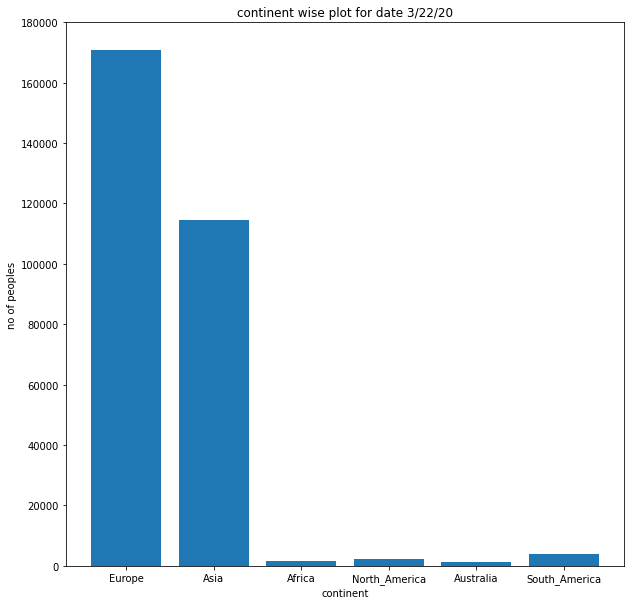

In [262]:
plt.figure(figsize=(10,10))
plt.bar(y_pos,total_continent_through_World)
plt.title('continent wise plot for date 3/22/20')
plt.xlabel('continent')
plt.ylabel('no of peoples')
plt.ylim(0,180000)
plt.xticks(y_pos, total_continent_through_World_unique)
plt.show()